# Lab01

## Load Dataset

In [1]:
import numpy as np
import pandas as pd
#read csv
df = pd.read_csv('loan_data_set.csv')
df.drop("Loan_ID", axis=1, inplace=True)
# df.dropna(axis=0, inplace=True)  # drop NULL rows

## Encode categorical features

In [2]:
df.Gender = df.Gender.map({'Male': 1, 'Female': 0})
df.Dependents = df.Dependents.map({'0': 0, '1': 0.25, '2': 0.5, '3+': 1})
df.Married = df.Married.map({'Yes': 1, 'No': 0})
df.Education = df.Education.map({'Graduate': 1, 'Not Graduate': 0})
df.Self_Employed = df.Self_Employed.map({'Yes': 1, 'No': 0})
df.Property_Area = df.Property_Area.map({'Urban': 1, 'Semiurban': 0.5, 'Rural': 0})
df.Loan_Status = df.Loan_Status.map({'Y': 1, 'N': 0}) #Encode categorical features
#df.head()

## Replace NULL rows with mean

In [3]:
#处理空列(用平均值替代)
for column in list(df.columns[df.isnull().sum() > 0]):
    mean_val = df[column].mean()
    df[column].fillna(mean_val, inplace=True)


## Standardization

In [4]:
#去均值和方差标准化
StandardScaler=lambda data:(data - data.mean()) / data.std()
df.ApplicantIncome = StandardScaler(df.ApplicantIncome)
df.CoapplicantIncome = StandardScaler(df.CoapplicantIncome)
df.LoanAmount = StandardScaler(df.LoanAmount)
df.Loan_Amount_Term = StandardScaler(df.Loan_Amount_Term)

## Stratified sampling and set division

In [5]:
train_rate = 0.7
verify_rate = 0.15
test_rate= 0.15
gbr = df.groupby('Loan_Status')  # 用分组函数groupby()进行数据的分组
training_data = gbr.apply(lambda x: x.sample(frac=train_rate,replace=False))
training_data = training_data.sample(frac=1)
training_data.reset_index(drop=True, inplace=True)

# 同样对抽取出的测试样本打乱顺序
validation_data = pd.concat([df, training_data]).drop_duplicates(keep=False)
gbr = validation_data.groupby('Loan_Status')
validation_data = gbr.apply(lambda x: x.sample(frac=verify_rate/(verify_rate+test_rate),replace=False))
validation_data = validation_data.sample(frac=1)
validation_data.reset_index(drop=True, inplace=True)

test_data = pd.concat([df, pd.concat([training_data,validation_data])]).drop_duplicates(keep=False)
test_data = test_data.sample(frac=1)
test_data.reset_index(drop=True, inplace=True)



##  Split set to X and y

In [6]:
#random sampling and  dataset splitting(x,y训练、验证、测试集）
#df = df.sample(frac=1.0, replace=True) #随机抽样
rows, cols = df.shape
x_training_data = training_data.iloc[:, 0:cols - 1]
y_training_data = training_data.iloc[:, cols - 1:]
x_validation_data = validation_data.iloc[:, 0:cols - 1]
y_validation_data=validation_data.iloc[:, cols - 1:]
x_test_data = test_data.iloc[:, :cols - 1]
y_test_data = test_data.iloc[:, cols - 1:] #划分x-y

## Convert dataframe to Ndarray

In [7]:
#convert to array
x_training_data = x_training_data.to_numpy()
y_training_data = np.squeeze(y_training_data.to_numpy())
x_validation_data = x_validation_data.to_numpy()
y_validation_data = np.squeeze(y_validation_data.to_numpy())
x_test_data = x_test_data.to_numpy()
y_test_data = np.squeeze(y_test_data.to_numpy()) #转化成数组形式

## train

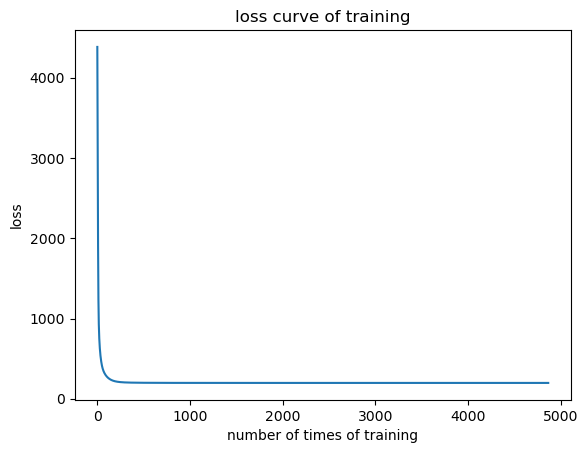

拟合系数：
[ 0.22477748  0.86817281 -0.31853912  0.5014857   0.01591371  0.36022438
 -0.21202662 -0.07354865 -0.04268725  3.86918217  0.15196294 -3.55750694]
loss:
197.67433124718164
norm：
0.000999144893439603
threshold:
0.5555555555555556
正确率：
0.75


In [8]:
#train
from Logistic import LogisticRegression
model = LogisticRegression()
model.fit(x_training_data, y_training_data, 0.001, 1e-3, 1e4)
model.verification(x_validation_data, y_validation_data)
goal = model.predict(x_test_data,model.threshold)
print("正确率：")
print(model.evaluate(goal, y_test_data))

## Test1

In [9]:
#对比默认分类阈值和经验证集训练得到的阈值
print("默认分类阈值：0.5")
goal = model.predict(x_test_data)
print("正确率：")
print(model.evaluate(goal, y_test_data))

默认分类阈值：0.5
正确率：
0.7608695652173914


## Test2

learning rate: 0.1


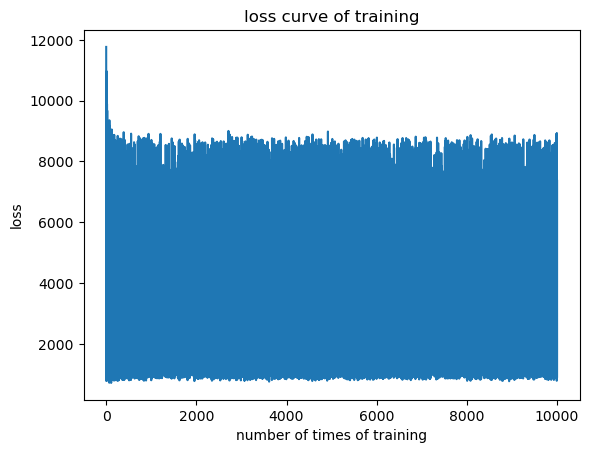

拟合系数：
[ 19.85703509  22.46426906   1.0954866   21.9940944    3.45924177
  -0.53542871  -2.20949532  -1.87195891   1.06802649  87.41630543
  13.37399103 -47.91875527]
loss:
7359.1222413817
norm：
498.6032061948041
threshold:
1.0
正确率：
0.7934782608695652
learning rate: 0.01


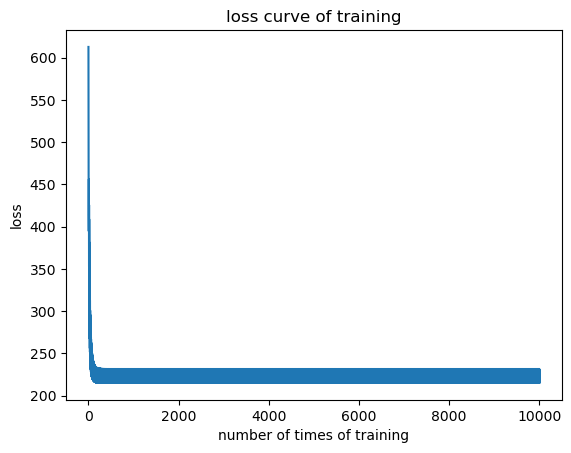

拟合系数：
[ 0.13396839  0.89650858 -0.38823533  0.44210453 -0.00753936  0.40782353
 -0.2585495  -0.07029172 -0.04898459  4.20416751  0.09294741 -4.42360064]
loss:
215.01241892577352
norm：
97.2996687200696
threshold:
0.38888888888888884
正确率：
0.75
learning rate: 0.001


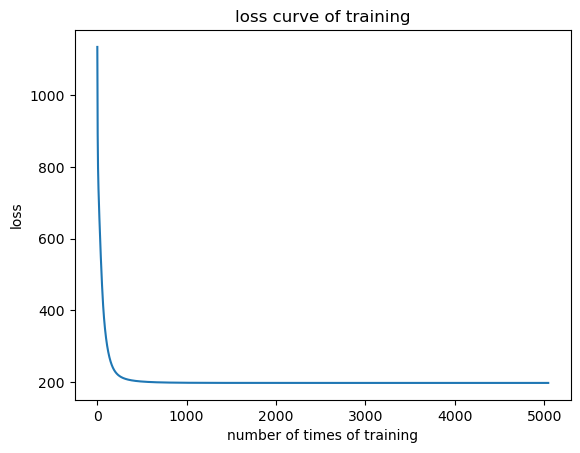

拟合系数：
[ 0.2247775   0.86817282 -0.31853911  0.50148571  0.01591371  0.36022439
 -0.21202663 -0.07354866 -0.04268725  3.86918223  0.15196295 -3.55750704]
loss:
197.67433124706565
norm：
0.0009989434924332244
threshold:
0.5555555555555556
正确率：
0.75
learning rate: 0.0001


In [ ]:
#对不同学习率进行测试
lrs=[0.1,0.01,0.001,0.0001]
for lr in lrs:
    print("learning rate:",lr)
    model = LogisticRegression()
    model.fit(x_training_data, y_training_data, lr, 1e-3, 1e4)
    model.verification(x_validation_data, y_validation_data)
    goal = model.predict(x_test_data,model.threshold)
    print("正确率：")
    print(model.evaluate(goal, y_test_data))

## Test 3

In [ ]:
#对不同最大迭代次数进行测试
max_iters=[100,1e3,1e4,1e5]
for max_iter in max_iters:
    print("max iter:",max_iter)
    model = LogisticRegression()
    model.fit(x_training_data, y_training_data, 0.001, 1e-3, max_iter)
    model.verification(x_validation_data, y_validation_data)
    goal = model.predict(x_test_data,model.threshold)
    print("正确率：")
    print(model.evaluate(goal, y_test_data))